Task Title: Machine Learning Task

Description

Project Domain / Category Data Science/Machine Learning Complete in 5 Days Abstract / Introduction Email has become a powerful tool for communication as it saves a lot of time and cost. It is one of the most popular and secure mediums for online transferring and communicating messages or data through the web. But, due to social networks, most of the emails contain unwanted information which is called spam. Identifying such spam emails is one of the important challenges. In this project, we will use the PYTHON text classification technique to identify or classify email spam messages. We will find accuracy, time, and error rate by applying suitable algorithms (such as NaiveBayes, NaiveBayesMultinomial, and J48, etc.) on Email Dataset and we will also compare which algorithm is best for text classification. *Functional Requirements: The administrator will perform all these tasks. 1. Collect Data Set * Gathering the data for Email spam contains spam and non-spam messages 2. Pre-processing * As most of the data in the real world are incomplete containing noisy and missing values. Therefore we have to apply Pre-processing to your data. 3. Feature Selection * After the pre-processing step, we apply the feature selection algorithm, the algorithm which deploy here is the Best First Feature Selection algorithm. 4. Apply Spam Filter Algorithms. * Handle Data: Load the dataset and split it into training and test datasets. * Summarize Data: summarize the properties in the training dataset so that we can calculate probabilities and make predictions. * Make a Prediction: Use the summaries of the dataset to generate a single prediction. * Make Predictions: Generate predictions given a test dataset and a summarized training dataset. * Evaluate Accuracy: Evaluate the accuracy of predictions made for a test dataset as the percentage correct out of all predictions made. 5. Train & Test Data * Split data into 70% training & 30% testing data sets. 6. Confusion Matrix * Create a confusion matrix table to describe the performance of a classification model. 7. Accuracy * Find the Accuracy of all algorithms and compare.

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import time  
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [244]:
# Load the dataset
data = pd.read_csv('spam_or_not_spam.csv')

In [246]:
# Check for NaN values in the 'email' column and drop them
data = data.dropna(subset=['email'])  # This will remove rows where 'email' is NaN

In [248]:
# printing the shape of dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (2999, 2)


In [250]:
# Displaying the first few rows of the dataset to get an overview of the data
print(data.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [252]:
# Printing the names of the columns in the dataset
print(data.columns)

Index(['email', 'label'], dtype='object')


In [254]:
# Print the number of missing values in each column of the dataset
print(data.isnull().sum())

email    0
label    0
dtype: int64


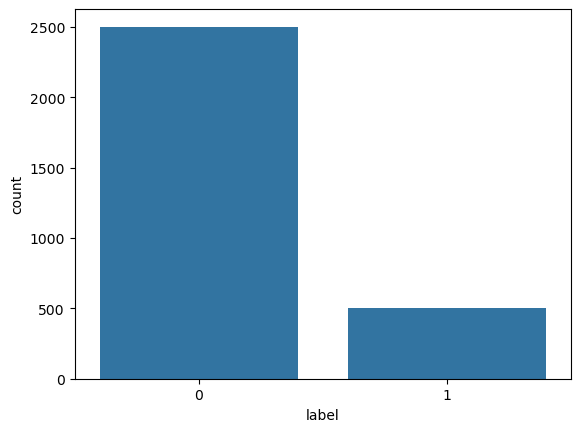

In [256]:
# Plot bar plot for spam vs non-spam emails
sns.countplot(x='label', data=data)
plt.show()

With TFID Features:

In [259]:
# Feature selection and Vectorization
# Initialize the TfidfVectorizer with English stop words to preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the 'email' column from the data into a matrix of TF-IDF features
X = vectorizer.fit_transform(data['email'])

# Extract the labels from the data for classification
y = data['label']

In [260]:
# # Split the dataset into training and testing sets
# The test size is set to 30% of the data, and a random state is specified for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [261]:
# # Initialize the Naive Bayes classifier
# Create an instance of the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the Naive Bayes model on the training data
nb.fit(X_train, y_train)

# Predict the labels for the test set using the trained Naive Bayes model
y_pred_nb = nb.predict(X_test)


# # Initialize the Multinomial Naive Bayes classifier
# Create another instance of the Multinomial Naive Bayes classifier
nbm = MultinomialNB()

# Fit the Multinomial Naive Bayes model on the training data
nbm.fit(X_train, y_train)

# Predict the labels for the test set using the trained Multinomial Naive Bayes model
y_pred_nbm = nbm.predict(X_test)


# # Initialize the J48 Decision Tree classifier
# Create an instance of the Decision Tree Classifier
j48 = DecisionTreeClassifier()

# Fit the J48 model on the training data
j48.fit(X_train, y_train)

# Predict the labels for the test set using the trained J48 model
y_pred_j48 = j48.predict(X_test)


# Measure the time taken to fit the Naive Bayes model
start_time = time.time()
# Fit the Naive Bayes model on the training data
nb.fit(X_train, y_train)
end_time = time.time()
# Calculate the time taken
time_taken_nb = end_time - start_time

# Predict the labels for the test set using the trained Naive Bayes model
y_pred_nb = nb.predict(X_test)

# Calculate the error rate for the Naive Bayes model
error_rate_nb = 1 - accuracy_score(y_test, y_pred_nb)

# Print the accuracy, error rate, and time taken of the Naive Bayes model on the test set
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Naive Bayes Error Rate:', error_rate_nb)
print('Naive Bayes Time Taken:', time_taken_nb, 'seconds')

# Measure the time taken to fit the Multinomial Naive Bayes model
start_time = time.time()
# Fit the Multinomial Naive Bayes model on the training data
nbm.fit(X_train, y_train)
end_time = time.time()
# Calculate the time taken
time_taken_nbm = end_time - start_time

# Predict the labels for the test set using the trained Multinomial Naive Bayes model
y_pred_nbm = nbm.predict(X_test)

# Calculate the error rate for the Multinomial Naive Bayes model
error_rate_nbm = 1 - accuracy_score(y_test, y_pred_nbm)

# Print the accuracy, error rate, and time taken of the Multinomial Naive Bayes model on the test set
print('Naive Bayes Multinomial Accuracy:', accuracy_score(y_test, y_pred_nbm))
print('Naive Bayes Multinomial Error Rate:', error_rate_nbm)
print('Naive Bayes Multinomial Time Taken:', time_taken_nbm, 'seconds')

# Measure the time taken to fit the J48 model
start_time = time.time()
# Fit the J48 model on the training data
j48.fit(X_train, y_train)
end_time = time.time()
# Calculate the time taken
time_taken_j48 = end_time - start_time

# Predict the labels for the test set using the trained J48 model
y_pred_j48 = j48.predict(X_test)

# Calculate the error rate for the J48 model
error_rate_j48 = 1 - accuracy_score(y_test, y_pred_j48)

# Print the accuracy, error rate, and time taken of the J48 model on the test set
print('J48 Accuracy:', accuracy_score(y_test, y_pred_j48))
print('J48 Error Rate:', error_rate_j48)
print('J48 Time Taken:', time_taken_j48, 'seconds')


# # Print the Confusion Matrix for each model
# Display the confusion matrix for the Naive Bayes model
print('Confusion Matrix for Naive Bayes:')
print(confusion_matrix(y_test, y_pred_nb))

# Display the confusion matrix for the Multinomial Naive Bayes model
print('Confusion Matrix for Naive Bayes Multinomial:')
print(confusion_matrix(y_test, y_pred_nbm))

# Display the confusion matrix for the J48 model
print('Confusion Matrix for J48:')
print(confusion_matrix(y_test, y_pred_j48))

x = range(len(models))


Naive Bayes Accuracy: 0.8866666666666667
Naive Bayes Error Rate: 0.11333333333333329
Naive Bayes Time Taken: 0.0030035972595214844 seconds
Naive Bayes Multinomial Accuracy: 0.8866666666666667
Naive Bayes Multinomial Error Rate: 0.11333333333333329
Naive Bayes Multinomial Time Taken: 0.0030150413513183594 seconds
J48 Accuracy: 0.9544444444444444
J48 Error Rate: 0.04555555555555557
J48 Time Taken: 0.5309112071990967 seconds
Confusion Matrix for Naive Bayes:
[[741   0]
 [102  57]]
Confusion Matrix for Naive Bayes Multinomial:
[[741   0]
 [102  57]]
Confusion Matrix for J48:
[[719  22]
 [ 19 140]]


With Feature Extraction using Greedy Algorithm:

In [265]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Assuming X contains your TF-IDF features and y contains the labels
model = LogisticRegression()
selector = SelectFromModel(model)
selector.fit(X, y)
selected_features = X[:, selector.get_support()]

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# # Initialize the Naive Bayes classifier
# Create an instance of the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the Naive Bayes model on the training data
nb.fit(X_train, y_train)

# Predict the labels for the test set using the trained Naive Bayes model
y_pred_nb = nb.predict(X_test)


# # Initialize the Multinomial Naive Bayes classifier
# Create another instance of the Multinomial Naive Bayes classifier
nbm = MultinomialNB()

# Fit the Multinomial Naive Bayes model on the training data
nbm.fit(X_train, y_train)

# Predict the labels for the test set using the trained Multinomial Naive Bayes model
y_pred_nbm = nbm.predict(X_test)


# # Initialize the J48 Decision Tree classifier
# Create an instance of the Decision Tree Classifier
j48 = DecisionTreeClassifier()

# Fit the J48 model on the training data
j48.fit(X_train, y_train)

# Predict the labels for the test set using the trained J48 model
y_pred_j48 = j48.predict(X_test)


# Measure the time taken to fit the Naive Bayes model
start_time = time.time()
# Fit the Naive Bayes model on the training data
nb.fit(X_train, y_train)
end_time = time.time()
# Calculate the time taken
time_taken_nb = end_time - start_time

# Predict the labels for the test set using the trained Naive Bayes model
y_pred_nb = nb.predict(X_test)

# Calculate the error rate for the Naive Bayes model
error_rate_nb = 1 - accuracy_score(y_test, y_pred_nb)

# Print the accuracy, error rate, and time taken of the Naive Bayes model on the test set
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Naive Bayes Error Rate:', error_rate_nb)
print('Naive Bayes Time Taken:', time_taken_nb, 'seconds')


# # Initialize the Multinomial Naive Bayes classifier
# Create another instance of the Multinomial Naive Bayes classifier
nbm = MultinomialNB()

# Measure the time taken to fit the Multinomial Naive Bayes model
start_time = time.time()
# Fit the Multinomial Naive Bayes model on the training data
nbm.fit(X_train, y_train)
end_time = time.time()
# Calculate the time taken
time_taken_nbm = end_time - start_time

# Predict the labels for the test set using the trained Multinomial Naive Bayes model
y_pred_nbm = nbm.predict(X_test)

# Calculate the error rate for the Multinomial Naive Bayes model
error_rate_nbm = 1 - accuracy_score(y_test, y_pred_nbm)

# Print the accuracy, error rate, and time taken of the Multinomial Naive Bayes model on the test set
print('Naive Bayes Multinomial Accuracy:', accuracy_score(y_test, y_pred_nbm))
print('Naive Bayes Multinomial Error Rate:', error_rate_nbm)
print('Naive Bayes Multinomial Time Taken:', time_taken_nbm, 'seconds')


# # Initialize the J48 Decision Tree classifier
# Create an instance of the Decision Tree Classifier
j48 = DecisionTreeClassifier()

# Measure the time taken to fit the J48 model
start_time = time.time()
# Fit the J48 model on the training data
j48.fit(X_train, y_train)
end_time = time.time()
# Calculate the time taken
time_taken_j48 = end_time - start_time

# Predict the labels for the test set using the trained J48 model
y_pred_j48 = j48.predict(X_test)

# Calculate the error rate for the J48 model
error_rate_j48 = 1 - accuracy_score(y_test, y_pred_j48)

# Print the accuracy, error rate, and time taken of the J48 model on the test set
print('J48 Accuracy:', accuracy_score(y_test, y_pred_j48))
print('J48 Error Rate:', error_rate_j48)
print('J48 Time Taken:', time_taken_j48, 'seconds')


# # Print the Confusion Matrix for each model
# Display the confusion matrix for the Naive Bayes model
print('Confusion Matrix for Naive Bayes:')
print(confusion_matrix(y_test, y_pred_nb))

# Display the confusion matrix for the Multinomial Naive Bayes model
print('Confusion Matrix for Naive Bayes Multinomial:')
print(confusion_matrix(y_test, y_pred_nbm))

# Display the confusion matrix for the J48 model
print('Confusion Matrix for J48:')
print(confusion_matrix(y_test, y_pred_j48))

# Train a new model with selected features
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Naive Bayes Accuracy: 0.9733333333333334
Naive Bayes Error Rate: 0.026666666666666616
Naive Bayes Time Taken: 0.002000093460083008 seconds
Naive Bayes Multinomial Accuracy: 0.9733333333333334
Naive Bayes Multinomial Error Rate: 0.026666666666666616
Naive Bayes Multinomial Time Taken: 0.0019996166229248047 seconds
J48 Accuracy: 0.96
J48 Error Rate: 0.040000000000000036
J48 Time Taken: 0.30698156356811523 seconds
Confusion Matrix for Naive Bayes:
[[500   0]
 [ 16  84]]
Confusion Matrix for Naive Bayes Multinomial:
[[500   0]
 [ 16  84]]
Confusion Matrix for J48:
[[487  13]
 [ 11  89]]
Accuracy with selected features: 0.9633333333333334


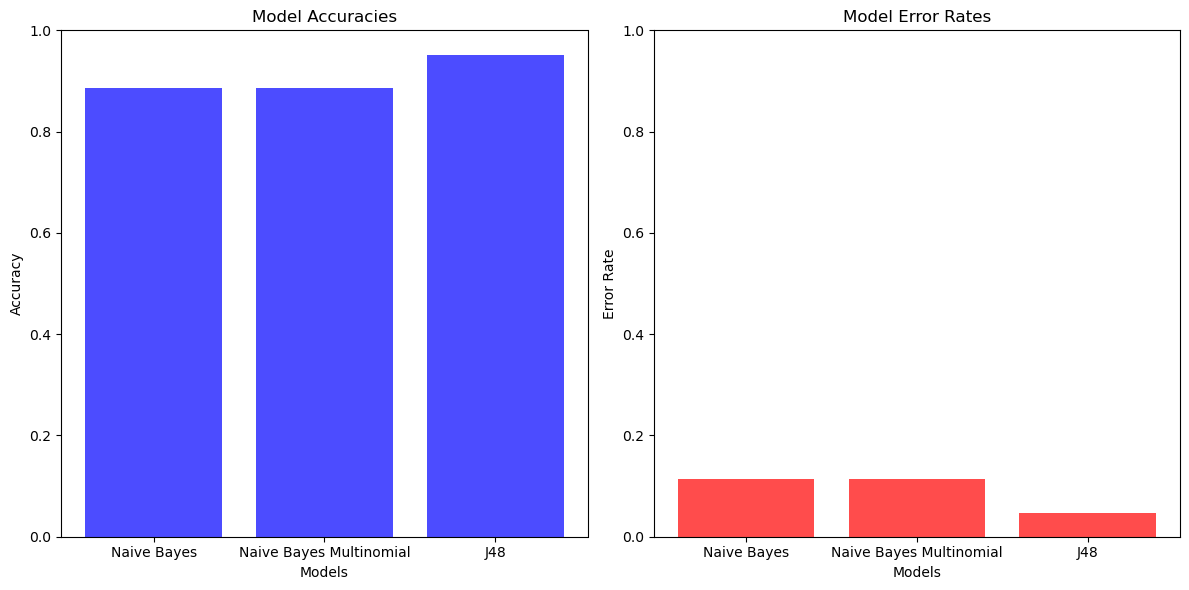

In [267]:

# Create a bar plot for accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x, accuracies, color='blue', alpha=0.7)
plt.xticks(x, models)
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')

# Create a bar plot for error rates
plt.subplot(1, 2, 2)
plt.bar(x, error_rates, color='red', alpha=0.7)
plt.xticks(x, models)
plt.ylim(0, 1)
plt.title('Model Error Rates')
plt.ylabel('Error Rate')
plt.xlabel('Models')

# Show the plots
plt.tight_layout()
plt.show()